In [1]:
'''
Import the dataset

Perform NLP preprocessing

Apply ML models

Training/Testing/Hyperparameter tuning

'''

'\nImport the dataset\n\nPerform NLP preprocessing\n\nApply ML models\n\nTraining/Testing/Hyperparameter tuning\n\n'

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.svm import LinearSVC

from sklearn.metrics import precision_recall_fscore_support

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

Importing training file and adding column titles

In [3]:
df = pd.read_csv('dataset/input_train.csv')

#add column title
df.columns = ['document_label', 'document_text']
df = df[pd.notnull(df['document_text'])]

df.shape
X = df['document_text']
y = df['document_label']

X.describe()

count                                                 61709
unique                                                59753
top       bf064c332aa1 079935e500e5 1a4dd36c6de0 7efa289...
freq                                                     11
Name: document_text, dtype: object

Tfid vectorizer could be the best choice. Due to max_df & min_df issues, I chose count vectorizer with 1000 features

In [4]:
# vectorizer = TfidfVectorizer(sublinear_tf=True, ngram_range=(1, 2), min_df = 1, max_df = 0.9, max_features = 5000)
# vector_content = vectorizer.fit_transform(X.apply(lambda x: np.str_(x)))
# print(vector_content.shape)

vectorizer = CountVectorizer(ngram_range=(1,2), max_features=1000)
vector_content = vectorizer.fit_transform(X.apply(lambda x: np.str_(x)))
print(vector_content.shape)

(61709, 1000)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    vector_content, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=1)

Testing different models (SVM_Classifier with first 30000 data points)

In [6]:
#import model
svm_clf = SVC(gamma="scale")
svm_clf.fit(X_train[:30000], y_train[:30000])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Testing the model with a test set

In [7]:
df_test = pd.read_csv('dataset/input_test_.csv')

print(df_test.shape)

df_test.columns = ['document_label', 'document_text']
df_test = df_test[pd.notnull(df_test['document_text'])]

df.shape
X_t = df_test['document_text']
y_t = df_test['document_label']

df_test.head()

df_test.to_csv(r'dataset/input_test_label.csv', index = False, encoding='utf-8')

(172, 2)


In [8]:
df_label = pd.read_csv('dataset/input_test_label.csv')
X_ = df_label['document_text']

print(X_.shape)

vectorize = CountVectorizer(ngram_range=(1,2), max_features=1000)
vec_content = vectorize.fit_transform(X_.apply(lambda x: np.str_(x)))
print(vec_content.shape)
                                      
y_t = df_label['document_label'].values.tolist()                                        
y_label = svm_clf.predict(vec_content)   

print(precision_recall_fscore_support(y_t, y_label, average='macro'))     

(172,)
(172, 1000)
(0.12105263157894737, 0.13355973528387322, 0.08289246693502014, None)


C:\Python27\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [9]:
y_pred = svm_clf.predict(X_val)

print('\t\t\t\tCLASSIFICATIION METRICS\n')
print(metrics.classification_report(y_val, y_pred, 
                                    target_names= df['document_label'].unique()))


				CLASSIFICATIION METRICS

                         precision    recall  f1-score   support

         RETURNED CHECK       0.81      0.29      0.43        45
                   BILL       0.90      0.89      0.90      3706
          POLICY CHANGE       0.40      0.04      0.07        55
    CANCELLATION NOTICE       0.84      0.86      0.85      1780
            DECLARATION       0.80      0.87      0.83      1929
     CHANGE ENDORSEMENT       0.74      0.79      0.77       178
     NON-RENEWAL NOTICE       0.57      0.18      0.28       193
                 BINDER       0.90      0.89      0.89       972
   REINSTATEMENT NOTICE       0.94      0.59      0.72       150
   DELETION OF INTEREST       1.00      0.29      0.45        41
      EXPIRATION NOTICE       0.94      0.70      0.80       113
INTENT TO CANCEL NOTICE       0.78      0.86      0.82      2119
            APPLICATION       0.92      0.91      0.92       896
            BILL BINDER       0.98      0.75      0.85      

In [10]:
#precision recall score for a svm classifier
print(precision_recall_fscore_support(y_val, y_pred, average='macro'))
y_pred_test = svm_clf.predict(X_test)
print(precision_recall_fscore_support(y_test, y_pred_test, average='macro'))

(0.8232001016104897, 0.6355821553463901, 0.6830182780049482, None)
(0.8224502012196832, 0.6332329502983584, 0.67518174611608, None)


In [11]:
#Testing Multinomial model with the same training data

NB_classifier = MultinomialNB().fit(X_train, y_train)

y_pred_val = NB_classifier.predict(X_val)
y_pred_test_NB = NB_classifier.predict(X_test)


print("naive bayes with validation set")
print(precision_recall_fscore_support(y_val, y_pred_val, average='macro'))

naive bayes with validation set
(0.48614410981510753, 0.7006008662940548, 0.5179960498635788, None)


In [12]:
#sgd classifier testing

from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier(max_iter=1000, tol=1e-3)

sgd_model.fit(X_train, y_train)

y_pred_val_ = sgd_model.predict(X_val)
y_pred_test_sgd = sgd_model.predict(X_test)

print("sgd classifier with validation data")
print(precision_recall_fscore_support(y_val, y_pred_val_, average='macro'))

print("sgd classifier with test data")
print(precision_recall_fscore_support(y_test, y_pred_test_sgd, average='macro'))

print("sgd classifier with another preprocessed test data")
y_lab = sgd_model.predict(vec_content)
print(precision_recall_fscore_support(y_t, y_lab, average='macro'))



sgd classifier with validation data
(0.7350894347444358, 0.6893896384485654, 0.7043163503572354, None)
sgd classifier with test data
(0.7381741064741049, 0.6974251881282748, 0.7098177642802309, None)
sgd classifier with another preprocessed test data
(0.07924063116370808, 0.0772937152247497, 0.05391786663958927, None)


C:\Python27\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Python27\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


[[ 121    9    9    0    0    0    0    2    0    0    0    0    0    0]
 [   2 3146  229  192   44    1    1   28   14    2   13    3    0   30]
 [  10   67 1860   25   27   20    2   41   24   14    3    1    3    9]
 [   5   80   75 1687    9    1    3    6   52   42    1    9    0    0]
 [   2   16   55    6   65    1    0   38    0    7    0    0    1    0]
 [   0    1   31    2    1  139    1    0    0    1    1    0    0    0]
 [   0    0   12    6    0    1  129    0    3    1    0    0    0    0]
 [   1   57  266   18   84    1    1 1354    3    3    3    0    1   11]
 [   3    6   18   19    1    0    2    0  815    4    2    4    0    0]
 [   0    0   15  106   13    4    1    2    4  786    0    1    0    0]
 [   0   14    9    4    4    0    1    0    1    0  107    0    0    0]
 [   0    6    0   15    0    0    0    0    1    1    0   22    0    0]
 [   0    3   16    0    2    0    0    7    1    0    0    0   15    1]
 [   0   24   18    1    1    0    0    2    0    1

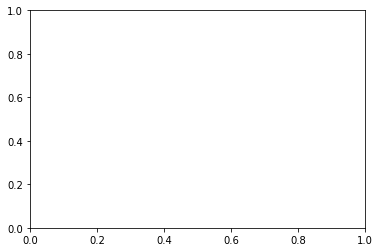

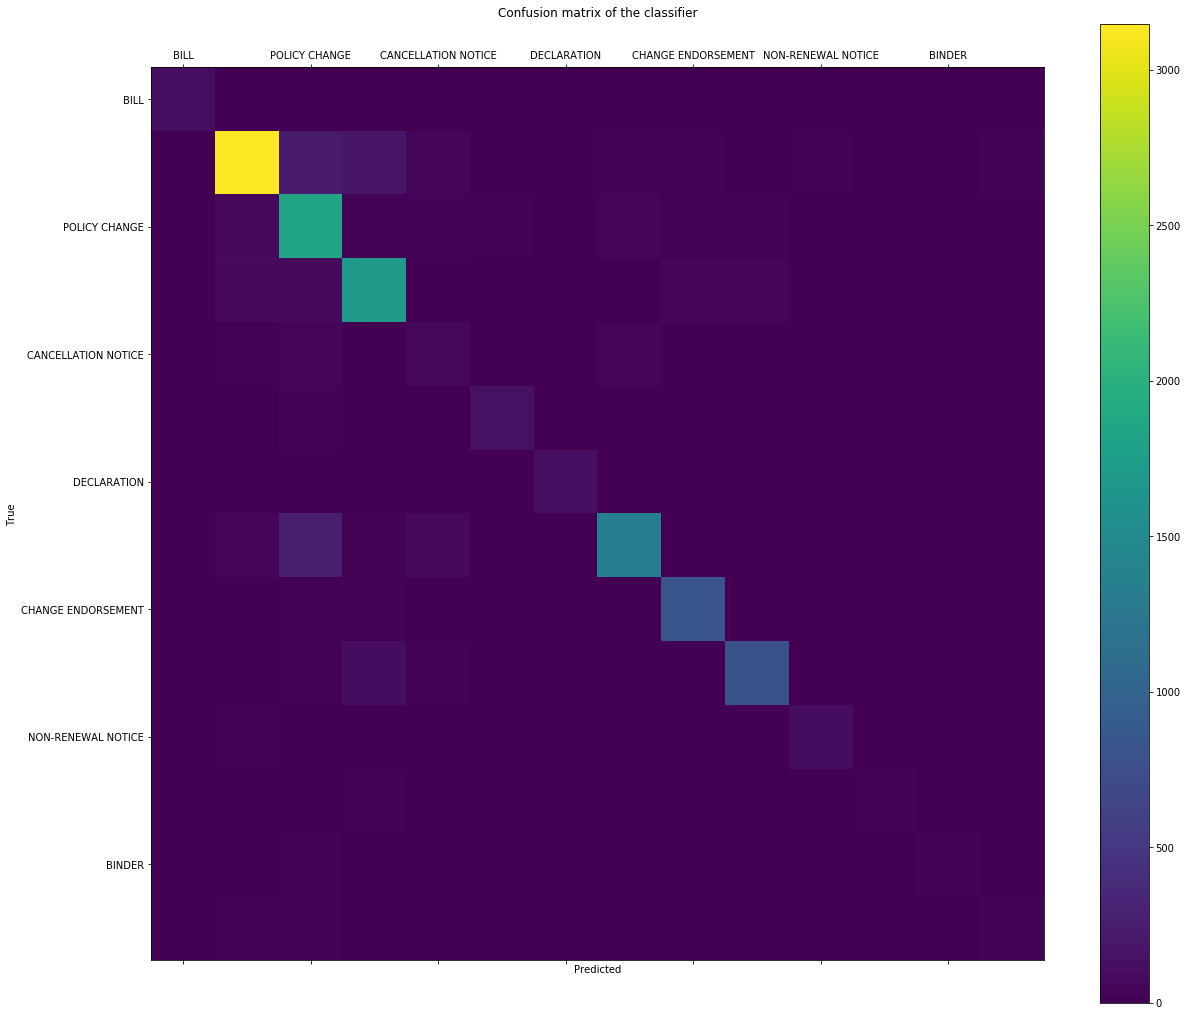

In [16]:

#confusion matrix for test set

from sklearn.metrics import confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()

labels = df["document_label"].unique()

cm = confusion_matrix(y_test, y_pred_test_sgd, labels)
print(cm)

fig = plt.figure(figsize = (20,18))
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [14]:
#Models experimentation

models = [
    LinearSVC(),
    MultinomialNB(),
    SGDClassifier(max_iter=1000, tol=1e-3)
]

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, vector_content, y, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

C:\Python27\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [15]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
LinearSVC,0.849957,0.002511
MultinomialNB,0.681181,0.002016
SGDClassifier,0.843068,0.006915
